# Capstone 2 Modeling, Clustering: Cluster Analysis on Customer Behavior

In this part of my capstone, I will will incorporating mdeling techniques in order to analyze customer behavior: In order to do this, we will be using clustering. 

In the previous step of this capstone, I initiated preprocessing steps before modeling, such as handling missing values, encoding categorical variables, scaling numerical features, and creating additional relevant features.
There were some steps involving feature engineering or transformation techniques applied to prepare the data for modeling.

The two dataframes I will be loading is the cleaned data from the original dataframe and another dataframe a scaled dataframe in order to be used for the modeling process and any other analyses. 

We will perform dimensionality reduction as it helps in simplifying the data representation, improving clustering performance, and enhancing the interpretability of the results, making it an important preprocessing step before applying K-means clustering.

Main Objectives: 
- Modeling Process
    - Dimensionality Reduction
    - Elbow Method
    - Agglomerative Clustering
    - Cluster Examination

Business Recommendations in Further Documentation and Presentation:
- Translate segmentation results into actionable insights for the business.
  - Based on the results, we can look at which clusters to look into in order to provide better marketing strategies and operations.
- Recommend strategies for product customization, marketing campaigns, and customer engagement based on identified customer segments.
- Apply unsupervised clustering algorithms (e.g., K-means clustering) to group customers based on similarities.
- Interpret and visualize cluster using EDA to understand the defining features of each segment.

In [1]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


Importing necessary libraries and modules:

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
from matplotlib.colors import ListedColormap
import warnings 
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from mpl_toolkits.mplot3d import Axes3D

Loading the data:

In [2]:
df = pd.read_csv('preprocessed_df.csv')
df.head()

,ID,Age,Education,Marital Status,Parental Status,Children,Kidhome,Teenhome,Income,Spending,...,Meat,Fish,Sweets,Gold,Web,Catalog,Store,Discount Purchases,Total Promo,NumWebVisitsMonth
0,5524,58,0,0,0,0,0,0,58138.0,1617,...,546,172,88,88,8,10,4,3,0,7
1,2174,61,0,0,1,2,1,1,46344.0,27,...,6,2,1,6,1,1,2,2,0,5
2,4141,50,0,1,0,0,0,0,71613.0,776,...,127,111,21,42,8,2,10,1,0,4
3,6182,31,0,1,1,1,1,0,26646.0,53,...,20,10,3,5,2,0,4,2,0,6
4,5324,34,1,1,1,1,1,0,58293.0,422,...,118,46,27,15,5,3,6,5,0,5


In [62]:
df.columns

Index(['ID', 'Age', 'Education', 'Marital Status', 'Parental Status',
       'Children', 'Kidhome', 'Teenhome', 'Income', 'Spending', 'Customer For',
       'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'Web',
       'Catalog', 'Store', 'Discount Purchases', 'Total Promo',
       'NumWebVisitsMonth', 'Clusters'],
      dtype='object')

In [3]:
sdf = pd.read_csv('scaled_df.csv')
sdf.head()

,Age,Education,Marital Status,Parental Status,Children,Kidhome,Teenhome,Income,Spending,Customer For,...,Fruits,Meat,Fish,Sweets,Gold,Web,Catalog,Store,Discount Purchases,NumWebVisitsMonth
0,1.016868,-0.89438,-1.347635,-1.584362,-1.264308,-0.824939,-0.930615,0.288947,1.680176,1.975467,...,1.554170,1.679746,2.461068,1.475396,0.845669,1.407639,2.509801,-0.552429,0.348738,0.692865
1,1.273264,-0.89438,-1.347635,0.631169,1.395139,1.032627,0.905974,-0.262003,-0.962202,-1.667017,...,-0.636431,-0.713455,-0.650414,-0.631638,-0.729742,-1.110921,-0.568970,-1.167738,-0.168700,-0.131421
2,0.333146,-0.89438,0.742041,-1.584362,-1.264308,-0.824939,-0.930615,0.918423,0.282541,-0.172996,...,0.572177,-0.177201,1.344595,-0.147262,-0.038098,1.407639,-0.226884,1.293496,-0.686137,-0.543564
3,-1.290693,-0.89438,0.742041,0.631169,0.065416,1.032627,-0.930615,-1.182183,-0.918994,-1.925349,...,-0.560893,-0.651409,-0.503991,-0.583200,-0.748954,-0.751127,-0.911056,-0.552429,-0.168700,0.280722
4,-1.034298,0.57070,0.742041,0.631169,0.065416,1.032627,-0.930615,0.296187,-0.305762,-0.823131,...,0.421101,-0.217088,0.154911,-0.001950,-0.556831,0.328256,0.115201,0.062879,1.383614,-0.131421


# Dimensionality Reduction, PCA

In this task, we're dealing with a multitude of factors or attributes that will determine the final classification outcome. However, having a high number of features can pose challenges, especially when many of them are correlated and redundant. To address this issue, I'll employ dimensionality reduction on the selected features before passing them through a classifier.

Dimensionality reduction involves decreasing the number of variables under consideration by extracting a set of principal variables. One popular technique for this purpose is Principal Component Analysis (PCA). When using Principal Component Analysis (PCA) for dimensionality reduction, the process involves eliminating one or more of the least important principal components. By doing so, we obtain a lower-dimensional representation of the data while still retaining the maximum amount of variance present in the original data.

In this section of the project, I'll be performing dimensionality reduction using PCA, aiming to reduce the dimensions to 3. This will simplify the data while still capturing the essential information for classification.

In [4]:
pca = PCA(n_components=3)

# Fitting PCA on the scaled dataset
pca.fit(sdf)

# Transforming the scaled dataset using PCA
PCA_sdf = pd.DataFrame(pca.transform(sdf), columns=["col1", "col2", "col3"])

# Descriptive statistics of the transformed dataset
PCA_sdf.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2236.0,1.271096e-17,2.809546,-5.681373,-2.561884,-0.804413,2.372214,7.515344
col2,2236.0,7.626577e-17,1.612080,-3.706054,-1.326109,-0.198327,1.219946,5.548077
col3,2236.0,-5.640489e-17,1.204132,-3.378925,-0.825020,0.032694,0.814316,5.761180


We will take a look at the 3d visualization for this dataset. The dimension is reduced to 3.

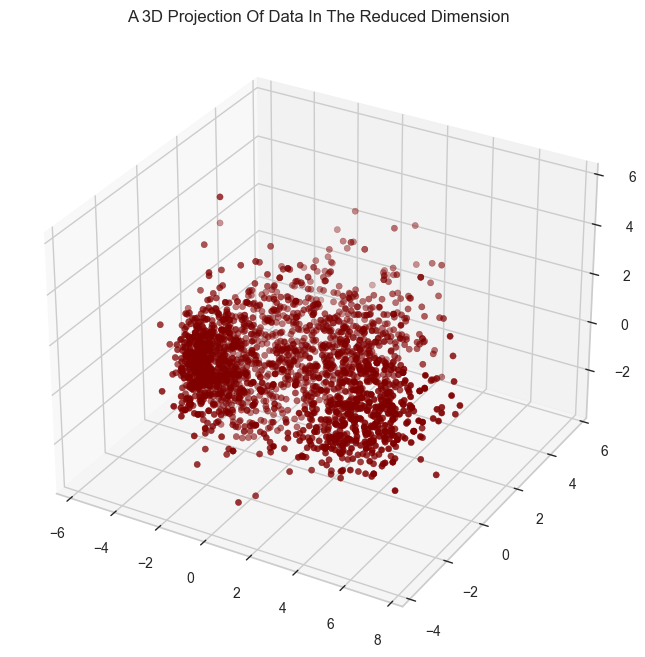

In [5]:
x = PCA_sdf["col1"]
y = PCA_sdf["col2"]
z = PCA_sdf["col3"]

# Creating a 3D projection plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x, y, z, c="maroon", marker="o")
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

The plot above shows the data after it has been processed through the principal component analysis. This project helps us interpret the data in an easier way.

# Clustering

Hierarchical Clustering
- In this project, we'll utilize hierarchical clustering, a method commonly used to group objects based on their similarities. Specifically, we'll focus on agglomerative clustering, also known as AGNES (Agglomerative Nesting). Initially, each object is treated as a separate cluster. Then, clusters are progressively merged until all items belong to a single large cluster. 

K-Means Clustering
- Is a partitioning clustering technique where the number of clusters (k) is predetermined. The algorithm starts by randomly initializing k cluster centroids and assigns each data point to the nearest centroid. It then iteratively updates the centroids and reassigns data points to clusters until convergence, typically based on minimizing the within-cluster sum of squares. K-means is sensitive to the initial placement of centroids and may converge to local optima.

Difference

- Agglomerative clustering is a hierarchical method that does not require specifying the number of clusters in advance, while k-means clustering is a partitioning method that requires specifying the number of clusters beforehand. Each method has its advantages and limitations, and the choice between them depends on the characteristics of the data and the specific clustering objectives.

In [22]:
pip install --upgrade matplotlib yellowbrick

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 379.4 kB/s eta 0:00:0000:0100:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
Note: you may need to restart the kernel to use updated packages.


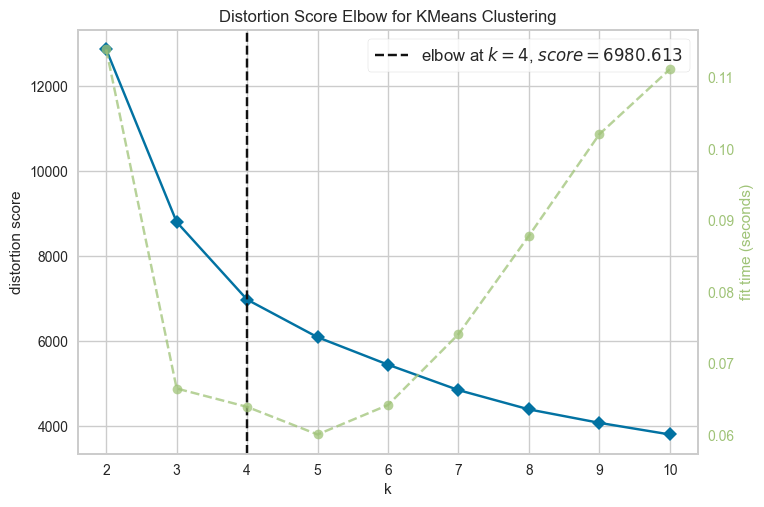

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [6]:
model = KMeans()
elbow_visualizer = KElbowVisualizer(model, k=(10))

# Fitting the visualizer to the data
elbow_visualizer.fit(PCA_sdf)

elbow_visualizer.show()

Findings: 
- Based on the analysis conducted in the preceding cell, it appears that the dataset is best segmented into 4 distinct clusters. We will apply the Agglomerative Clustering Model to the dataset to derive the final clusters, as well as KMeans Clustering.

Agglomerative Clustering Model (Hierarchical Clustering):
- The below code will perform Agglomerative Clustering on the dataset, assigning cluster labels to each data point, and adds these cluster labels to both the PCA-transformed dataset and the original dataset for further analysis.

# Hierarchical Clustering

In [7]:
num_clusters = 4
agglomerative_model = AgglomerativeClustering(num_clusters)
#fitting model
ac_cluster_label = agglomerative_model.fit_predict(PCA_sdf)

#adding "Clusters" feature to two dataframes
PCA_sdf["Clusters"] = ac_cluster_label
df["Clusters"] = ac_cluster_label

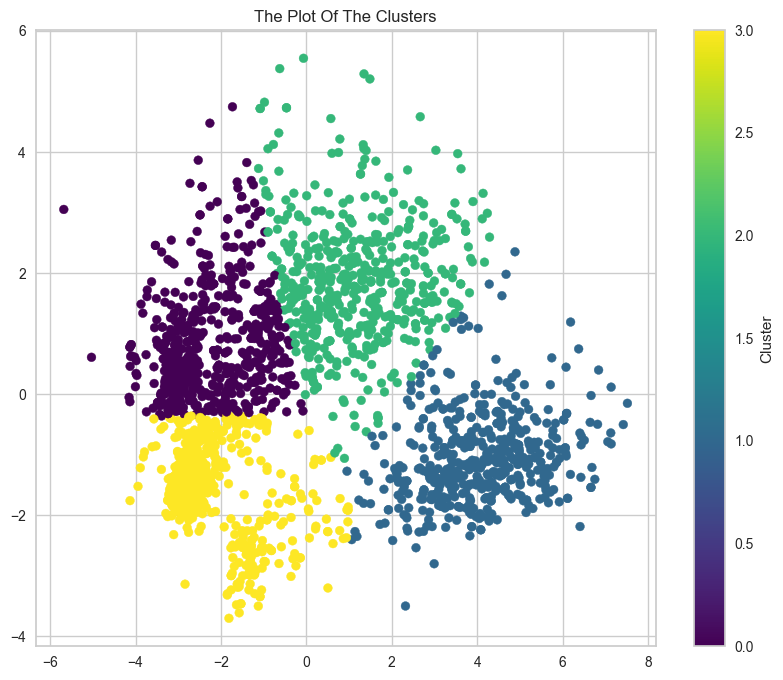

In [14]:
cmap = 'viridis'
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

# Scatter plot with cluster colors
scatter = ax.scatter(x, y, s=40, c=PCA_sdf["Clusters"], marker='o', cmap=cmap)

ax.set_title("The Plot Of The Clusters")
plt.colorbar(scatter, ax=ax, label="Cluster")
plt.show()

# K-Means Clustering

In [10]:
PCA_sdf.columns

Index(['col1', 'col2', 'col3', 'Clusters'], dtype='object')

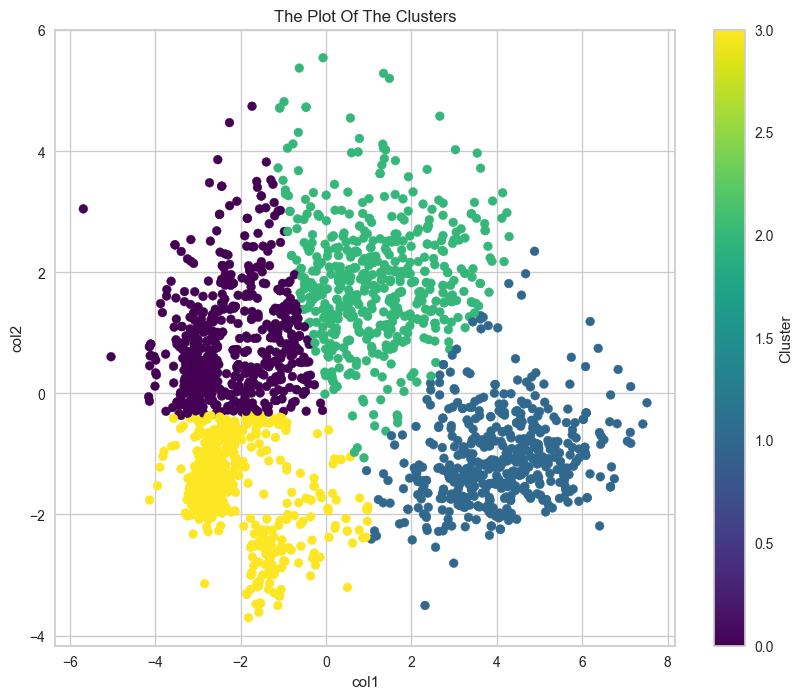

In [15]:
num_clusters = 4
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_cluster_label = kmeans_model.fit_predict(PCA_sdf[['col1', 'col2']])  # Only select the columns you want to use for clustering

# Adding "Clusters" feature to PCA_sdf DataFrame
PCA_sdf["Clusters"] = kmeans_cluster_label

plt.figure(figsize=(10, 8))
plt.scatter(PCA_sdf['col1'], PCA_sdf['col2'], s=40, c=PCA_sdf["Clusters"], cmap='viridis', marker='o')

plt.title("The Plot Of The Clusters")
plt.colorbar(label="Cluster")
plt.xlabel("col1")
plt.ylabel("col2")
plt.show()

# Quantity Distribution:

In this unsupervised clustering scenario, our dataset lacks labeled data that could be used to evaluate or score the clustering model. Therefore, our focus in this section is to analyze the patterns within the formed clusters and understand their inherent characteristics.

To achieve this, we will conduct exploratory data analysis (EDA) with a focus on the cluster distributions. By examining the data within the context of clusters, we aim to draw insights and understand the underlying patterns.

To begin, we will explore the distribution of data points across different clusters to gain initial insights into how the data is grouped. This analysis will lay the foundation for further exploration and interpretation of the cluster patterns.

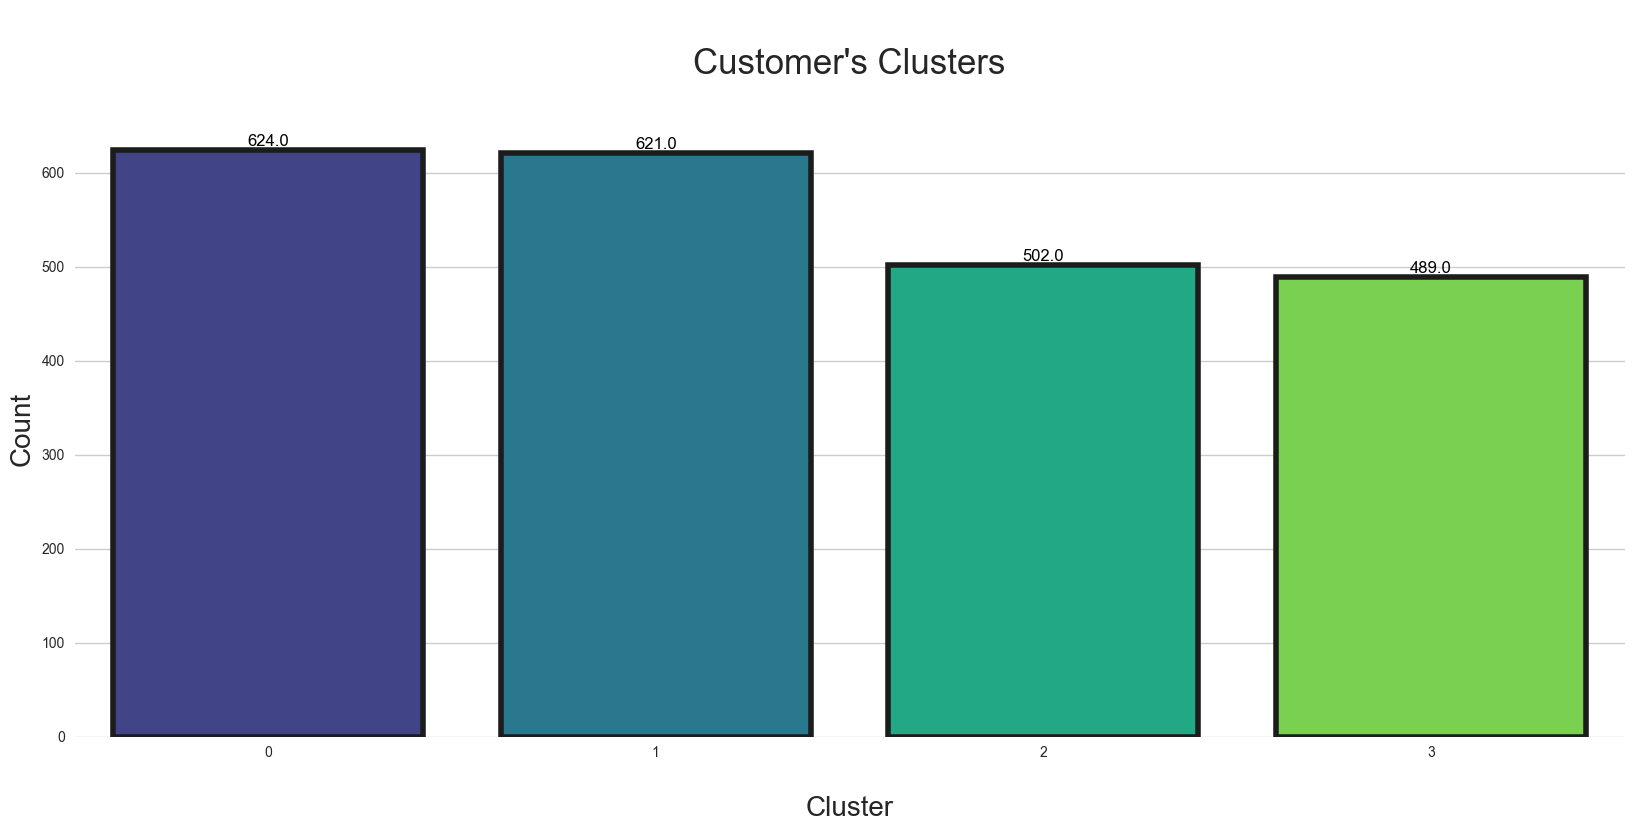

In [27]:
colors = ["#FF5733", "#FFC300", "#DFFF00", "#17A589"]

# Creating the plot
plt.figure(figsize=(20, 8))
ax = sns.countplot(x=df["Clusters"], palette=cmap, edgecolor="#1c1c1c", linewidth=4, saturation=1)

plt.title("\nCustomer's Clusters\n", fontsize=25)
plt.xlabel("\nCluster", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.xticks(rotation=0)

# annotations
for patch in ax.patches:
    ax.annotate(text=f'{patch.get_height()}', xy=(patch.get_x() + patch.get_width() / 2, patch.get_height()),
                xytext=(0, 3), textcoords='offset points', ha='center', fontsize=12, color='black')

sns.despine(left=True, bottom=True)
plt.show()

Findings:
- Cluster 0 = 624 customers
- Cluster 1 = 621 customers
- Cluster 2 = 502 customers
- Cluster 3 = 489 customers

They seem to be fairly distributed.

# Customer Profiles based on Clustering
    - Income vs Spending
    - Count of Spending Amounts
    - Count of Different Incomes
    - Count of Parental Statuses

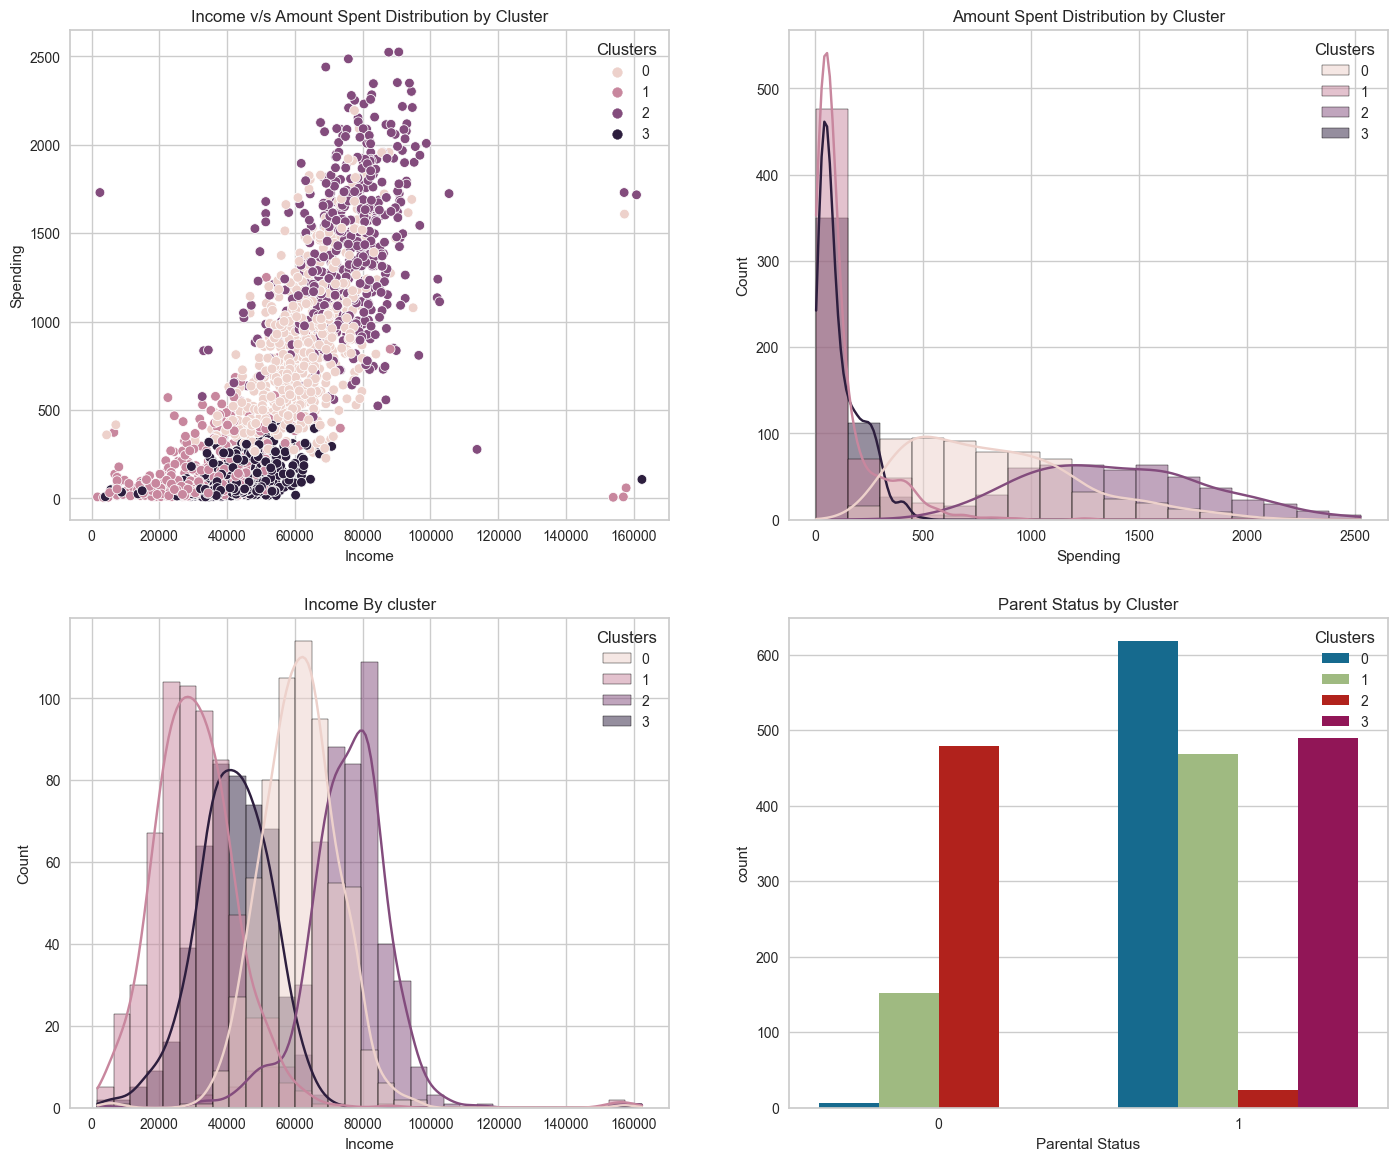

In [61]:
colors = ["#FF5733", "#FFC300", "#DFFF00", "#17A589"]
fig, ax = plt.subplots(2, 2, figsize=(17,14))
sns.scatterplot(data=df, x='Income', y='Spending', hue='Clusters', ax=ax[0][0])
sns.histplot(data=df, x='Spending', hue='Clusters', kde=True, ax=ax[0][1])
sns.histplot(data=df, x='Income', hue='Clusters', kde=True, ax=ax[1][0])
sns.countplot(data=df, x='Parental Status', hue='Clusters', ax=ax[1][1])
ax[0][0].set_title("Income v/s Amount Spent Distribution by Cluster")
ax[0][1].set_title("Amount Spent Distribution by Cluster")
ax[1][0].set_title("Income By cluster")
ax[1][1].set_title("Parent Status by Cluster")
plt.show()

Lets take a look at the same kind of graph for income vs spending, but with switched axises. 

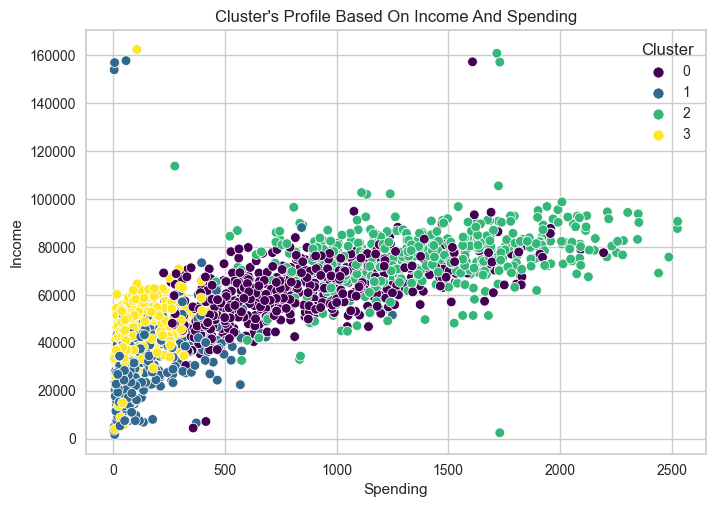

In [28]:
custom_palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"]

# Plotting the marplot with the custom palette
sns.scatterplot(data=df, x="Spending", y="Income", hue="Clusters", palette=cmap)
plt.title("Cluster's Profile Based On Income And Spending")
plt.xlabel("Spending")
plt.ylabel("Income")
plt.legend(title="Cluster")
plt.show()

Insights from te above visualization

- Cluster 0: average income | high spending 
- Cluster 1: low income | low spending
- Cluster 2: high income | high spending
- Cluster 3: average income | low spending

# Customer Clusters by Spending: Who are the biggest customers?

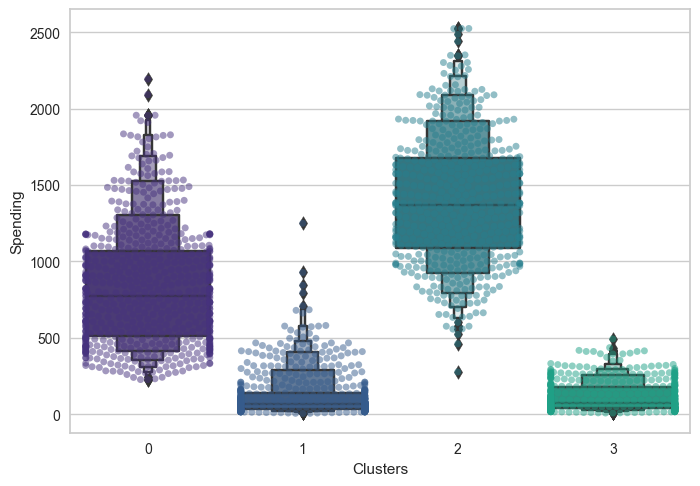

In [35]:
palette = sns.color_palette('viridis')
#Plotting a swarmplot
plt.figure()
plot = sns.swarmplot(x=df["Clusters"], y=df["Spending"], palette=palette, alpha=0.5)
plot = sns.boxenplot(x=df["Clusters"], y=df["Spending"], palette=palette)
plt.show()

Looking at the above swarmplots separated by clusters, cluster 2 is the biggest set of customers. Cluster 0 is the other big group of customers with lower spending. It is important to look into what customers are spending on.

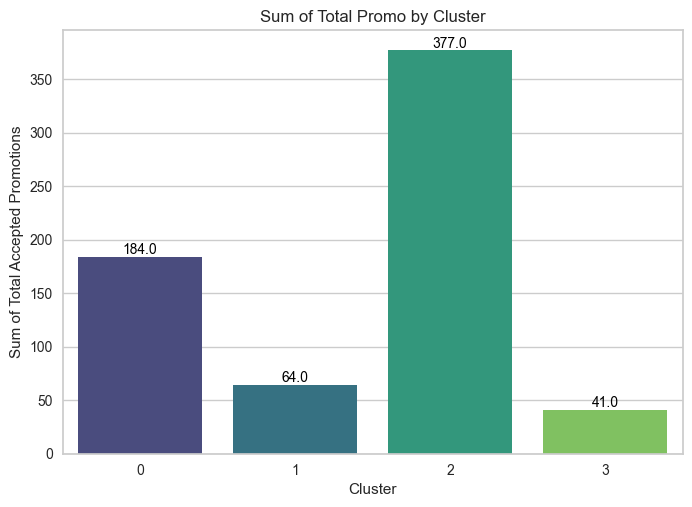

In [29]:
colors = ["#FF5733", "#FFC300", "#DFFF00", "#17A589"]

total_promos_by_cluster = df.groupby("Clusters")["Total Promo"].sum().reset_index()

# Plotting 
ax = sns.barplot(x="Clusters", y="Total Promo", data=total_promos_by_cluster, palette=cmap)

# Adding number annotations on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.title("Sum of Total Promo by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Sum of Total Accepted Promotions")
plt.show()

It seems as though clusters 1 and 3 had not a lot of responses to the campaigns. It seems this is where a better marketing campaign and better marketing strategies would be better if they want to increase sales utilizing campaigns.

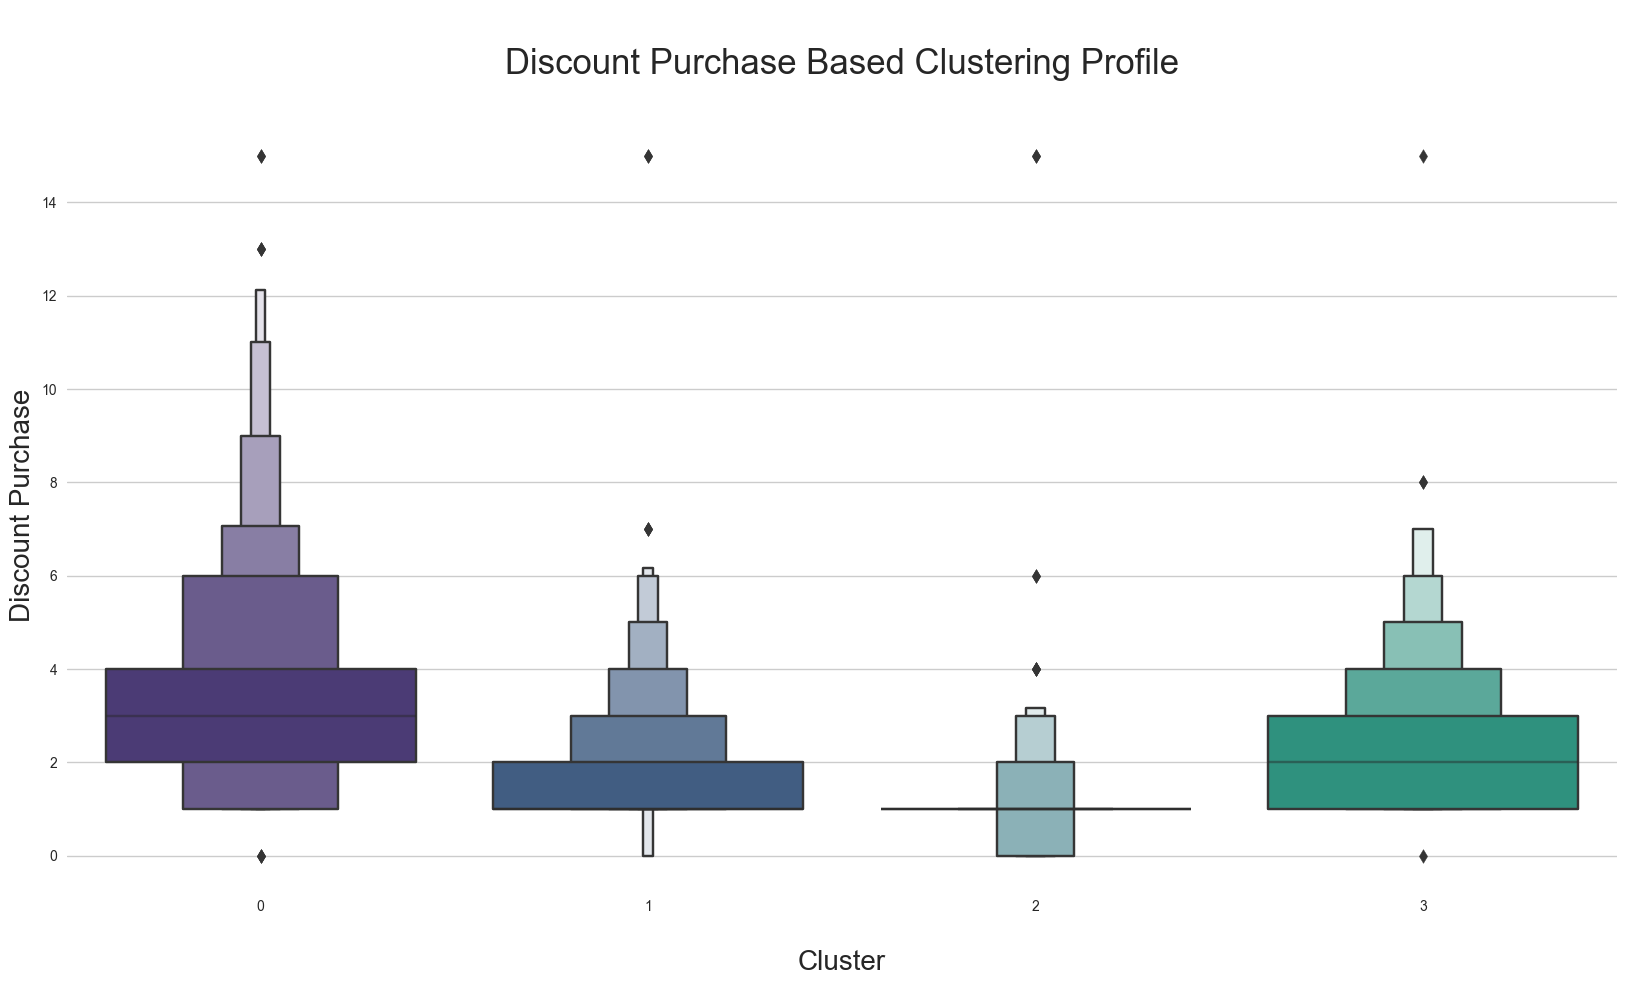

In [36]:
plt.figure(figsize=(20, 10))
sns.boxenplot(x=df["Clusters"], y=df["Discount Purchases"], palette=palette)

# Setting the title and labels 
plt.title("\nDiscount Purchase Based Clustering Profile\n", fontsize=25)
plt.ylabel("Discount Purchase", fontsize=20)
plt.xlabel("\nCluster", fontsize=20)

# Removing spines
sns.despine(left=True, bottom=True)
plt.show()

Insights from the above graph:

- Cluster 0: The majority of customers have made 2 to 4 discounted purchases 
- Cluster 1: The majority of customers have made 1 discounted purchases
- Cluster 2: The majority of customers have made 1 discounted purchases
- Cluster 3: The majority of customers have made 1 to 3 discounted purchases

# Customer Profiles Continued EDA:

The below visualizations are kde jointplots indicating more information based on the four different clusters.

Spending vs Age:

<Figure size 800x550 with 0 Axes>

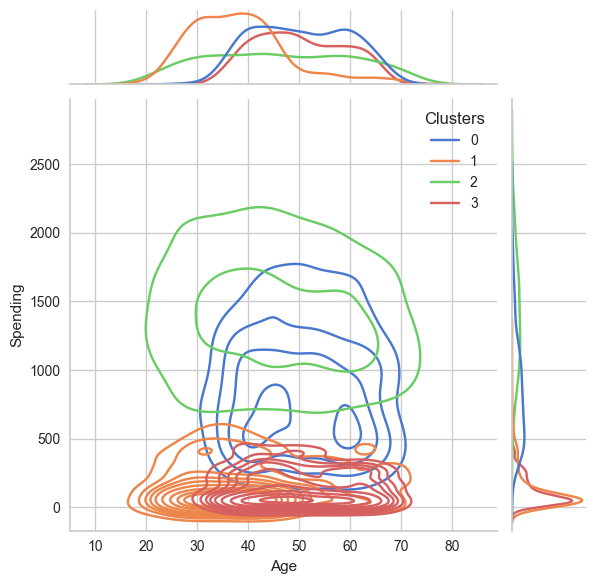

In [52]:
plt.figure()
sns.jointplot(x=df["Age"], y=df["Spending"], hue =df["Clusters"], kind="kde", palette="muted")
plt.show()

- Cluster 0: Most customers have an age range between 35 and 65. Their spending range is in between 100 and 1750
- Cluster 1: Most customers have an age range between 30 and 50. Their spending range is in between 0 and 600
- Cluster 2: Most customers have an age range between 30 and 65. Their spending range is in between 750 and 2300
- Cluster 3: Most customers have an age range between 40 and 65. Their spending range is in between 0 and 500

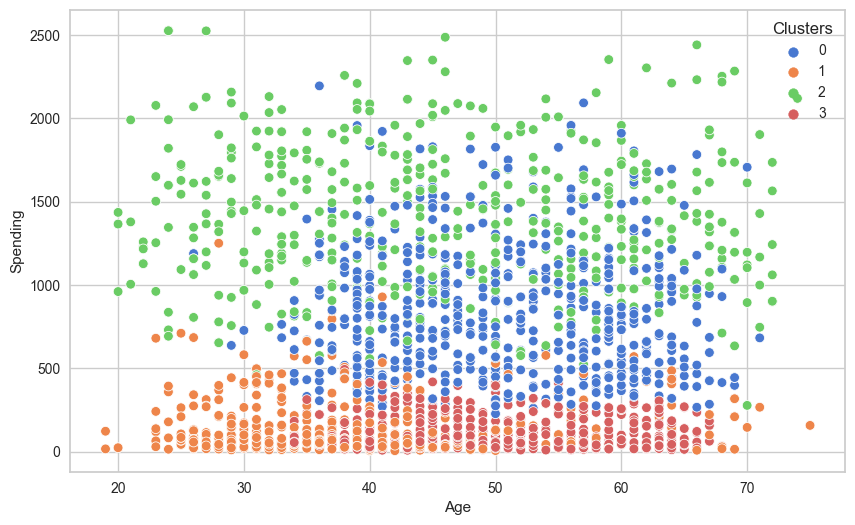

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Age", y="Spending", hue="Clusters", data=df, palette="muted")
plt.show()

<Figure size 800x550 with 0 Axes>

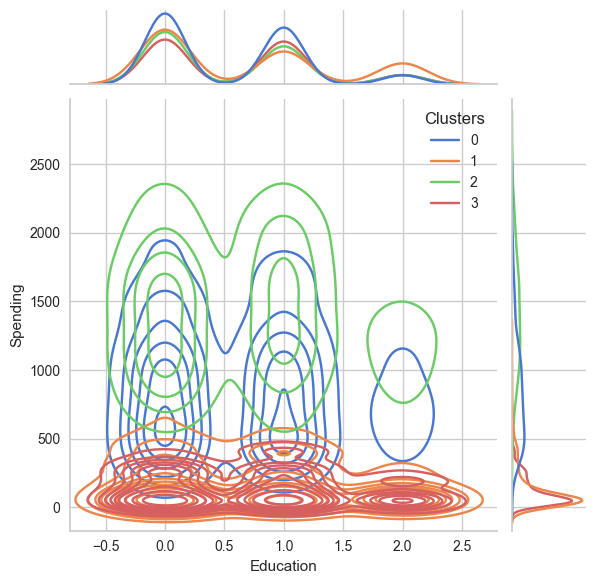

In [46]:
plt.figure()
sns.jointplot(x=df["Education"], y=df["Spending"], hue =df["Clusters"], kind="kde", palette="muted")
plt.show()

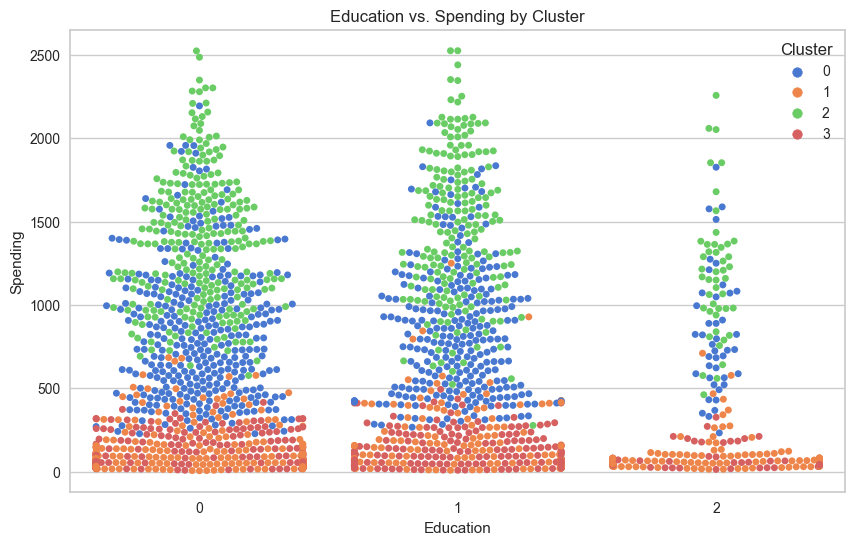

In [21]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x="Education", y="Spending", hue="Clusters", data=df, palette="muted")
plt.xlabel("Education")
plt.ylabel("Spending")
plt.title("Education vs. Spending by Cluster")
plt.legend(title="Cluster")
plt.show()

In [23]:
avg_spending_by_cluster_education = df.groupby(["Clusters", "Education"])["Spending"].mean().reset_index()

avg_spending_by_cluster_education

,Clusters,Education,Spending
0,0,0,834.687307
1,0,1,833.552124
2,0,2,829.023810
3,1,0,117.811502
4,1,1,150.664894
5,1,2,91.858333
6,2,0,1385.428030
7,2,1,1462.713542
8,2,2,1200.239130
9,3,0,116.513274


<Figure size 800x550 with 0 Axes>

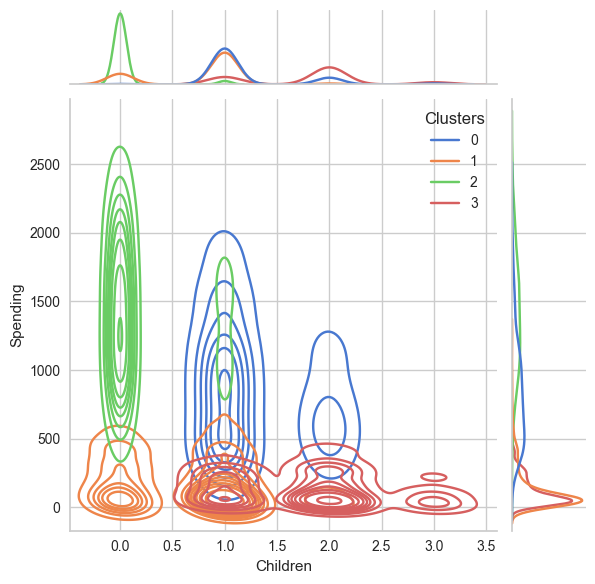

In [47]:
plt.figure()
sns.jointplot(x=df["Children"], y=df["Spending"], hue =df["Clusters"], kind="kde", palette="muted")
plt.show()

<Figure size 800x550 with 0 Axes>

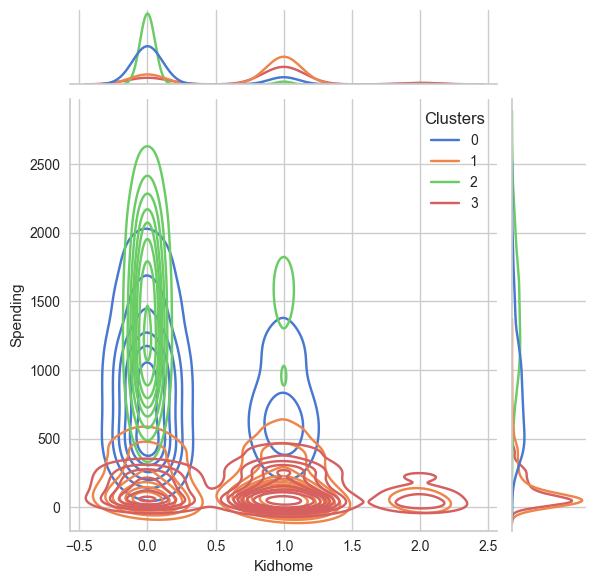

In [55]:
plt.figure()
sns.jointplot(x=df["Kidhome"], y=df["Spending"], hue =df["Clusters"], kind="kde", palette="muted")
plt.show()

<Figure size 800x550 with 0 Axes>

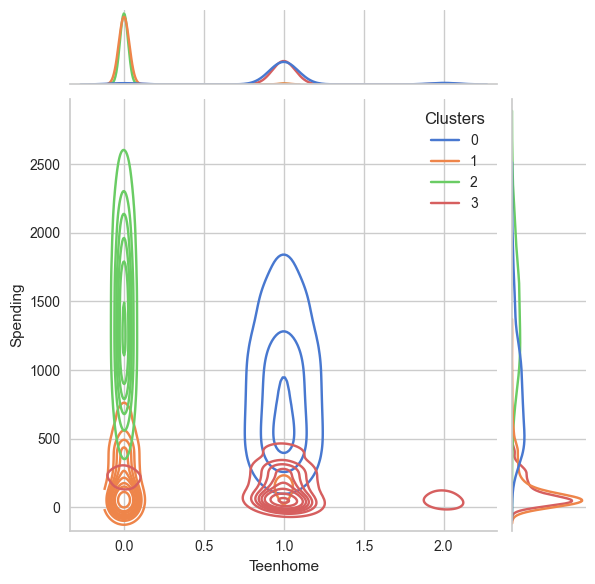

In [56]:
plt.figure()
sns.jointplot(x=df["Teenhome"], y=df["Spending"], hue =df["Clusters"], kind="kde", palette="muted")
plt.show()

<Figure size 800x550 with 0 Axes>

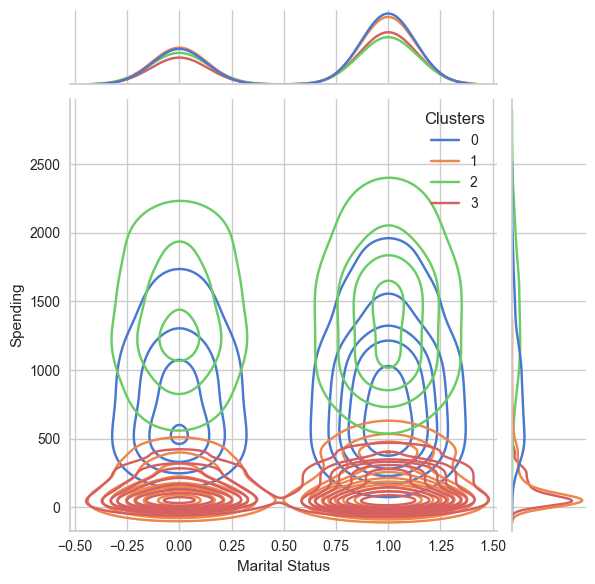

In [49]:
plt.figure()
sns.jointplot(x=df["Marital Status"], y=df["Spending"], hue =df["Clusters"], kind="kde", palette="muted")
plt.show()

<Figure size 800x550 with 0 Axes>

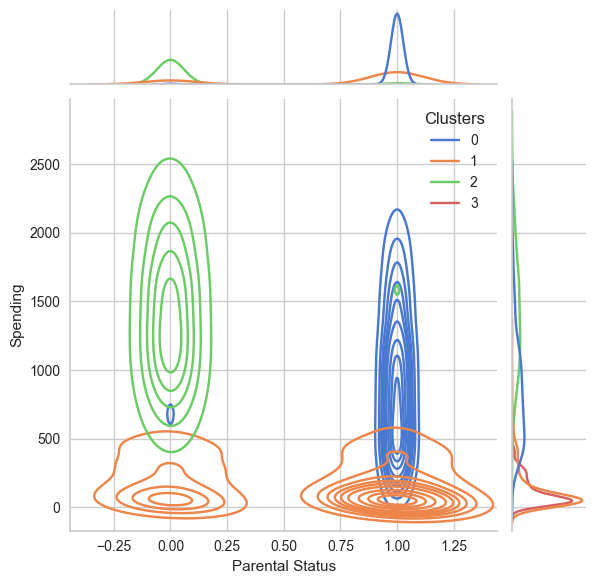

In [53]:
plt.figure()
sns.jointplot(x=df["Parental Status"], y=df["Spending"], hue =df["Clusters"], kind="kde", palette="muted")
plt.show()

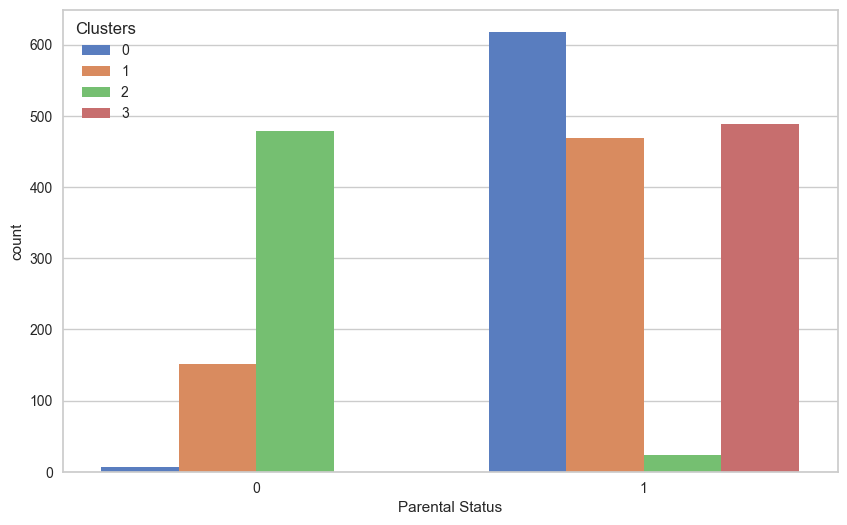

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Parental Status", hue="Clusters", data=df, palette="muted")
plt.show()

<Figure size 800x550 with 0 Axes>

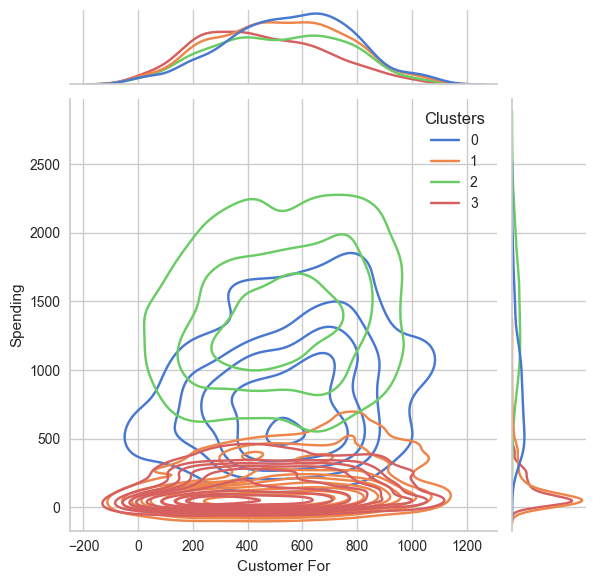

In [54]:
plt.figure()
sns.jointplot(x=df["Customer For"], y=df["Spending"], hue =df["Clusters"], kind="kde", palette="muted")
plt.show()

# Insights from the Customer Profiling:

- Cluster 0: 
  - Almost all are parents
  - A third utilized promos before purchasing products
  - Most customers have an age range between 35 and 65
  - Their spending range is in between 100 and 1750
  - Customers from this cluster tend to spend at least 500 but majority less than 1000
  - The customers of cluster 0 are graduate or in postgraduate level or in undergraduate level
  - Most of the customers of cluster 2 are married
  - Most of the customers of have one child, some have two
  - The majority of customers have made 2 to 4 discounted purchases 


- Cluster 1:
  - Some are parents
  - Less than 10% utilized promos before purchasing products
  - Most customers have an age range between 30 and 50
  - Their spending range is in between 0 and 600
  - Most of the customers of cluster 1 are graduate or in postgraduate level
  - Some of the customers of cluster 1 are married, some not married
  - Majority of customers do not have a child or have one child
  - Cluster 1: The majority of customers have made 1 discounted purchases



- Cluster 2:
  - Almost all are not parents
  - Most utilized promos before purchasing products
  - Cluster 2: Most customers have an age range between 30 and 65
  - Their spending range is in between 750 and 2300
  - Customers from this cluster tend to spend at least more than 1000
  - Most of the customers of cluster 2 are graduate and very few in postgraduate level
  - Most of the customers of cluster 2 are married
  - Majority of customers do not have a child
  - Cluster 2: The majority of customers have made 1 discounted purchases


- Cluster 3: 
  - Almost all are parents
  - Less than 10% utilized promos before purchasing products
  - Most customers have an age range between 40 and 65
  - Their spending range is in between 0 and 500
  - All the customers of cluster 3 are graduate or in postgraduate level and some are in undergraduate level
  - Some of the customers of cluster 1 are married, some not married
  - Most customers have one or two children, some have three
  - Cluster 3: The majority of customers have made 1 to 3 discounted purchases